# Learning the shape of manifold from the code generated from celluation from that manifold

## Data generation

### 1. How to generate the stabilizer generators of a code and store them

In [1]:
from panqec.codes.surface_2d import Toric2DCode
from panqec.codes.surface_2d import Planar2DCode
from panqec.codes.color_2d import Color488Code
from panqec.codes.color_2d import Color666PlanarCode
from panqec.codes.color_2d import Color666ToricCode

In [20]:
import filtration_gen as fg
import gudhi 

In [8]:
code_dict = {}

In [9]:
code_dict['big_code'] = Toric2DCode(10)

In [10]:
#code_dict['surf_code'] = Planar2DCode(3)

In [11]:
code_dict['color488_code'] = Color488Code(3)

In [12]:
code_dict['color666_code'] = Color666PlanarCode(5)

In [13]:
code_dict['color666_toric_code'] = Color666ToricCode(2)

In [24]:
del code_dict['surf_code']

In [25]:
code_dict

{'big_code': <panqec.codes.surface_2d._toric_2d_code.Toric2DCode at 0x10f8ce800>,
 'color488_code': <panqec.codes.color_2d._color_488_code.Color488Code at 0x10f8ceef0>,
 'color666_code': <panqec.codes.color_2d._color_666_planar_code.Color666PlanarCode at 0x10f8cea70>,
 'color666_toric_code': <panqec.codes.color_2d._color_666_toric_code.Color666ToricCode at 0x10f8cec50>}

So, essentially, we want to use the following two quantities, which coincides with the boundary maps $\partial_1$ and $\partial_2$

$$ C_2 \xrightarrow[]{\partial_2} C_1 \xrightarrow[]{\partial_1}  C_0$$

This is $\partial_2$

In [ ]:
hx = code.Hx.toarray() 

and this is the transpose of $\partial_1$

In [ ]:
hz = code.Hz.toarray() 

In [ ]:
hx

In [ ]:
hz.T

they are both written in a particular basis for the chain complex, and from basic linear algebra, this basis has dimension 8, which is exactly the number of qubits, and the boundary maps induce a subspace, that we would call the "codespace", on which we perform error correction

So, I guess this is a good starting point for generating the boundary maps. We can always choose different bases to generate different boundary maps that would give us the same "codespace". The topology of the "codespace" should be independent of the choice of basis, which is a good sanity check for our procedure, or could be used for just generating more data.

### 2. How to get from the Hx and Hz matrices to a persistent diagram? 

My current take is to interpret the matrices as hypergraphs, with a built-in simplicial complex structure, on which we will be able to perform a hypergraph Laplacian. The hypergraph Laplacian will be a unambiguous way to build a filtration to get our TDA going.

### 3. Using topological sort to generate a simplicial stream from a chain complex

### 4. Doing TDA on a simplicial stream 

In [ ]:
Hx = big_code.Hx.toarray()
Hz = big_code.Hz.toarray()
filtration = sample_filtration(Hx, Hz)
st_filtration = build_simplex_tree_filtration(Hx, Hz, filtration)
print(filtration)
print(st_filtration)

st = gudhi.SimplexTree()
t = 0.0
for simplex in st_filtration:
    st.insert(simplex, t)
    t += 1.0

print(st.dimension())
print(st.num_simplices())
print(st.num_vertices())

# Compute persistence
diag = st.persistence()

# Plotting the persistence diagram
gudhi.plot_persistence_diagram(diag)
st.betti_numbers()

big_code
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

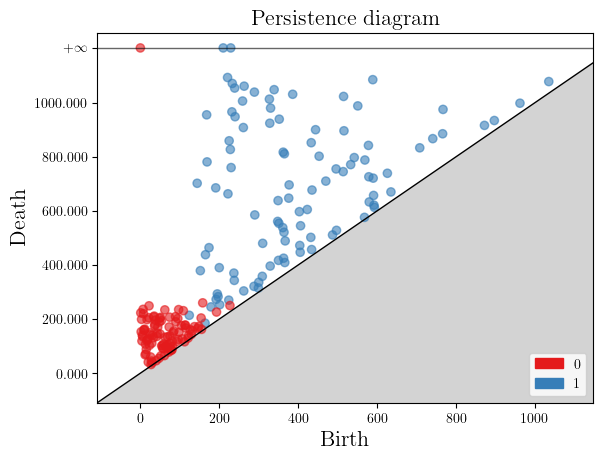

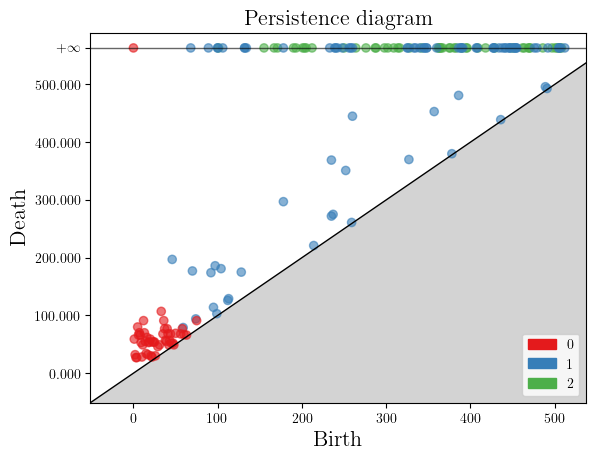

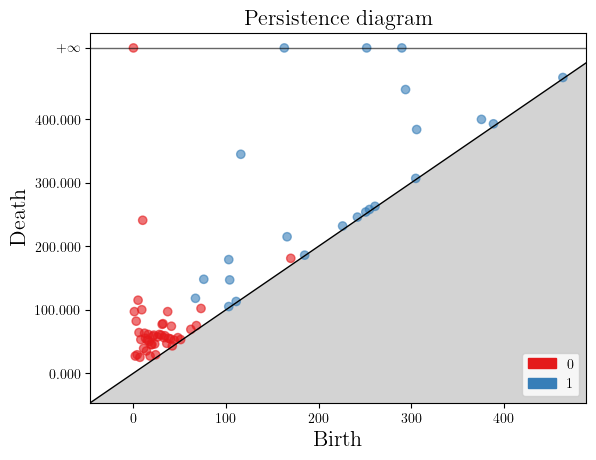

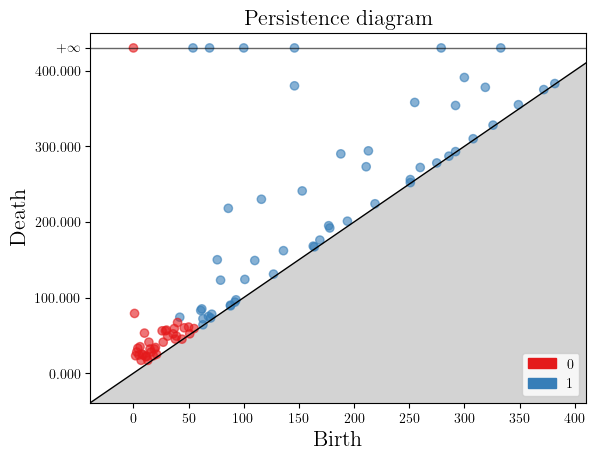

In [27]:
for key, val in code_dict.items():
    print(key)
    Hx = val.Hx.toarray()
    Hz = val.Hz.toarray()
    filtration = fg.sample_filtration(Hx, Hz)
    st_filtration = fg.build_simplex_tree_filtration(Hx, Hz, filtration)
    # print(filtration)
    # print(st_filtration)

    st = gudhi.SimplexTree()
    t = 0.0
    for simplex in st_filtration:
        st.insert(simplex, t)
        t += 1.0

    # print(st.dimension())
    # print(st.num_simplices())
    # print(st.num_vertices())

    # Compute persistence
    diag = st.persistence()
    betti_numbers = st.betti_numbers()
    # Plotting the persistence diagram
    ax = gudhi.plot_persistence_diagram(diag)
    fig = ax.get_figure()
    fig.savefig('figures/'+key+'_'+'betti_'+'_'.join(str(i) for i in betti_numbers))